## =======Size_Categorie .....The burned area of the forest ( Small,Large)===========

## IMport Necessary Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

In [2]:
forest_data = pd.read_csv('forestfires.csv')

In [3]:
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
df=forest_data.copy()

In [5]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [6]:
df.drop(['monthfeb','monthjan','monthjul','monthjun','monthmar','monthmay','monthnov','monthoct','monthsep'],axis=1,inplace=True)

In [7]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,1,0,0,0,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,0,0,0,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,1,0,0,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,1,0,0,0,0,1,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,1,0,0,0,0,1,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,1,0,0,0,0,1,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,1,0,0,0,0,0,1,0,small


In [8]:
df.drop(['daymon','daysat','daysun','daythu','daytue'],axis=1,inplace=True)

In [9]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daywed,monthapr,monthaug,monthdec,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,0,0,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,0,1,0,small


In [10]:
df.drop(['dayfri','daywed','monthapr','monthaug','monthdec'],axis=1,inplace=True)

In [11]:
df['area_km'] = df['area'] / 100

df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,area_km
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small,0.0000
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small,0.0000
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small,0.0000
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small,0.0000
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large,0.0644
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large,0.5429
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large,0.1116
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small,0.0000


In [12]:
df['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [13]:
percectange= 139/378*100


In [14]:
percectange

36.77248677248677

In [15]:
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [16]:
df['month'].value_counts(ascending=True)

11      1
1       2
5       2
4       9
12      9
10     15
6      17
2      20
7      32
3      54
9     172
8     184
Name: month, dtype: int64

In [17]:
df['day'].value_counts()

7    95
5    85
6    84
1    74
2    64
4    61
3    54
Name: day, dtype: int64

In [18]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,area_km
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small,0.0
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small,0.0
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small,0.0
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small,0.0
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small,0.0


In [19]:
print("Shape:", df.shape)

print("Data Types:", df.dtypes)

Shape: (517, 13)
Data Types: month              int64
day                int64
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
size_category     object
area_km          float64
dtype: object


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
month,517.0,7.475822,2.275990,1.0,7.0,8.0000,9.0000,12.0000
day,517.0,4.259188,2.072929,1.0,2.0,5.0000,6.0000,7.0000
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.6000,92.9000,96.2000
DMC,517.0,110.872340,64.046482,1.1,68.6,108.3000,142.4000,291.3000
DC,517.0,547.940039,248.066192,7.9,437.7,664.2000,713.9000,860.6000
ISI,517.0,9.021663,4.559477,0.0,6.5,8.4000,10.8000,56.1000
temp,517.0,18.889168,5.806625,2.2,15.5,19.3000,22.8000,33.3000
RH,517.0,44.288201,16.317469,15.0,33.0,42.0000,53.0000,100.0000
wind,517.0,4.017602,1.791653,0.4,2.7,4.0000,4.9000,9.4000
rain,517.0,0.021663,0.295959,0.0,0.0,0.0000,0.0000,6.4000


In [21]:
df.groupby(by='size_category').sum()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_km
size_category,,,,,,,,,,,,
large,1081,600,12627.5,15920.4,77267.3,1244.9,2633.6,5987,582.7,6.4,6323.94,63.2394
small,2784,1602,34235.8,41400.6,206017.7,3419.3,7132.1,16910,1494.4,4.8,318.11,3.1811


<AxesSubplot:xlabel='rain', ylabel='count'>

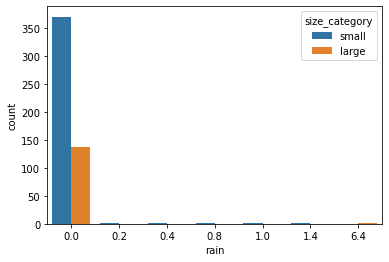

In [22]:
sns.countplot(x='rain',hue='size_category',data=df)


<AxesSubplot:xlabel='DMC', ylabel='DC'>

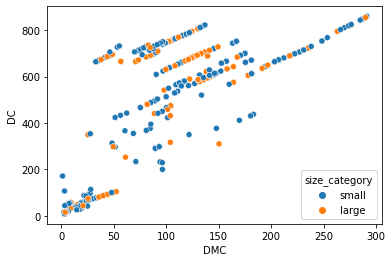

In [23]:
sns.scatterplot(x="DMC",y="DC",data=df,hue='size_category')

<Figure size 216x216 with 0 Axes>

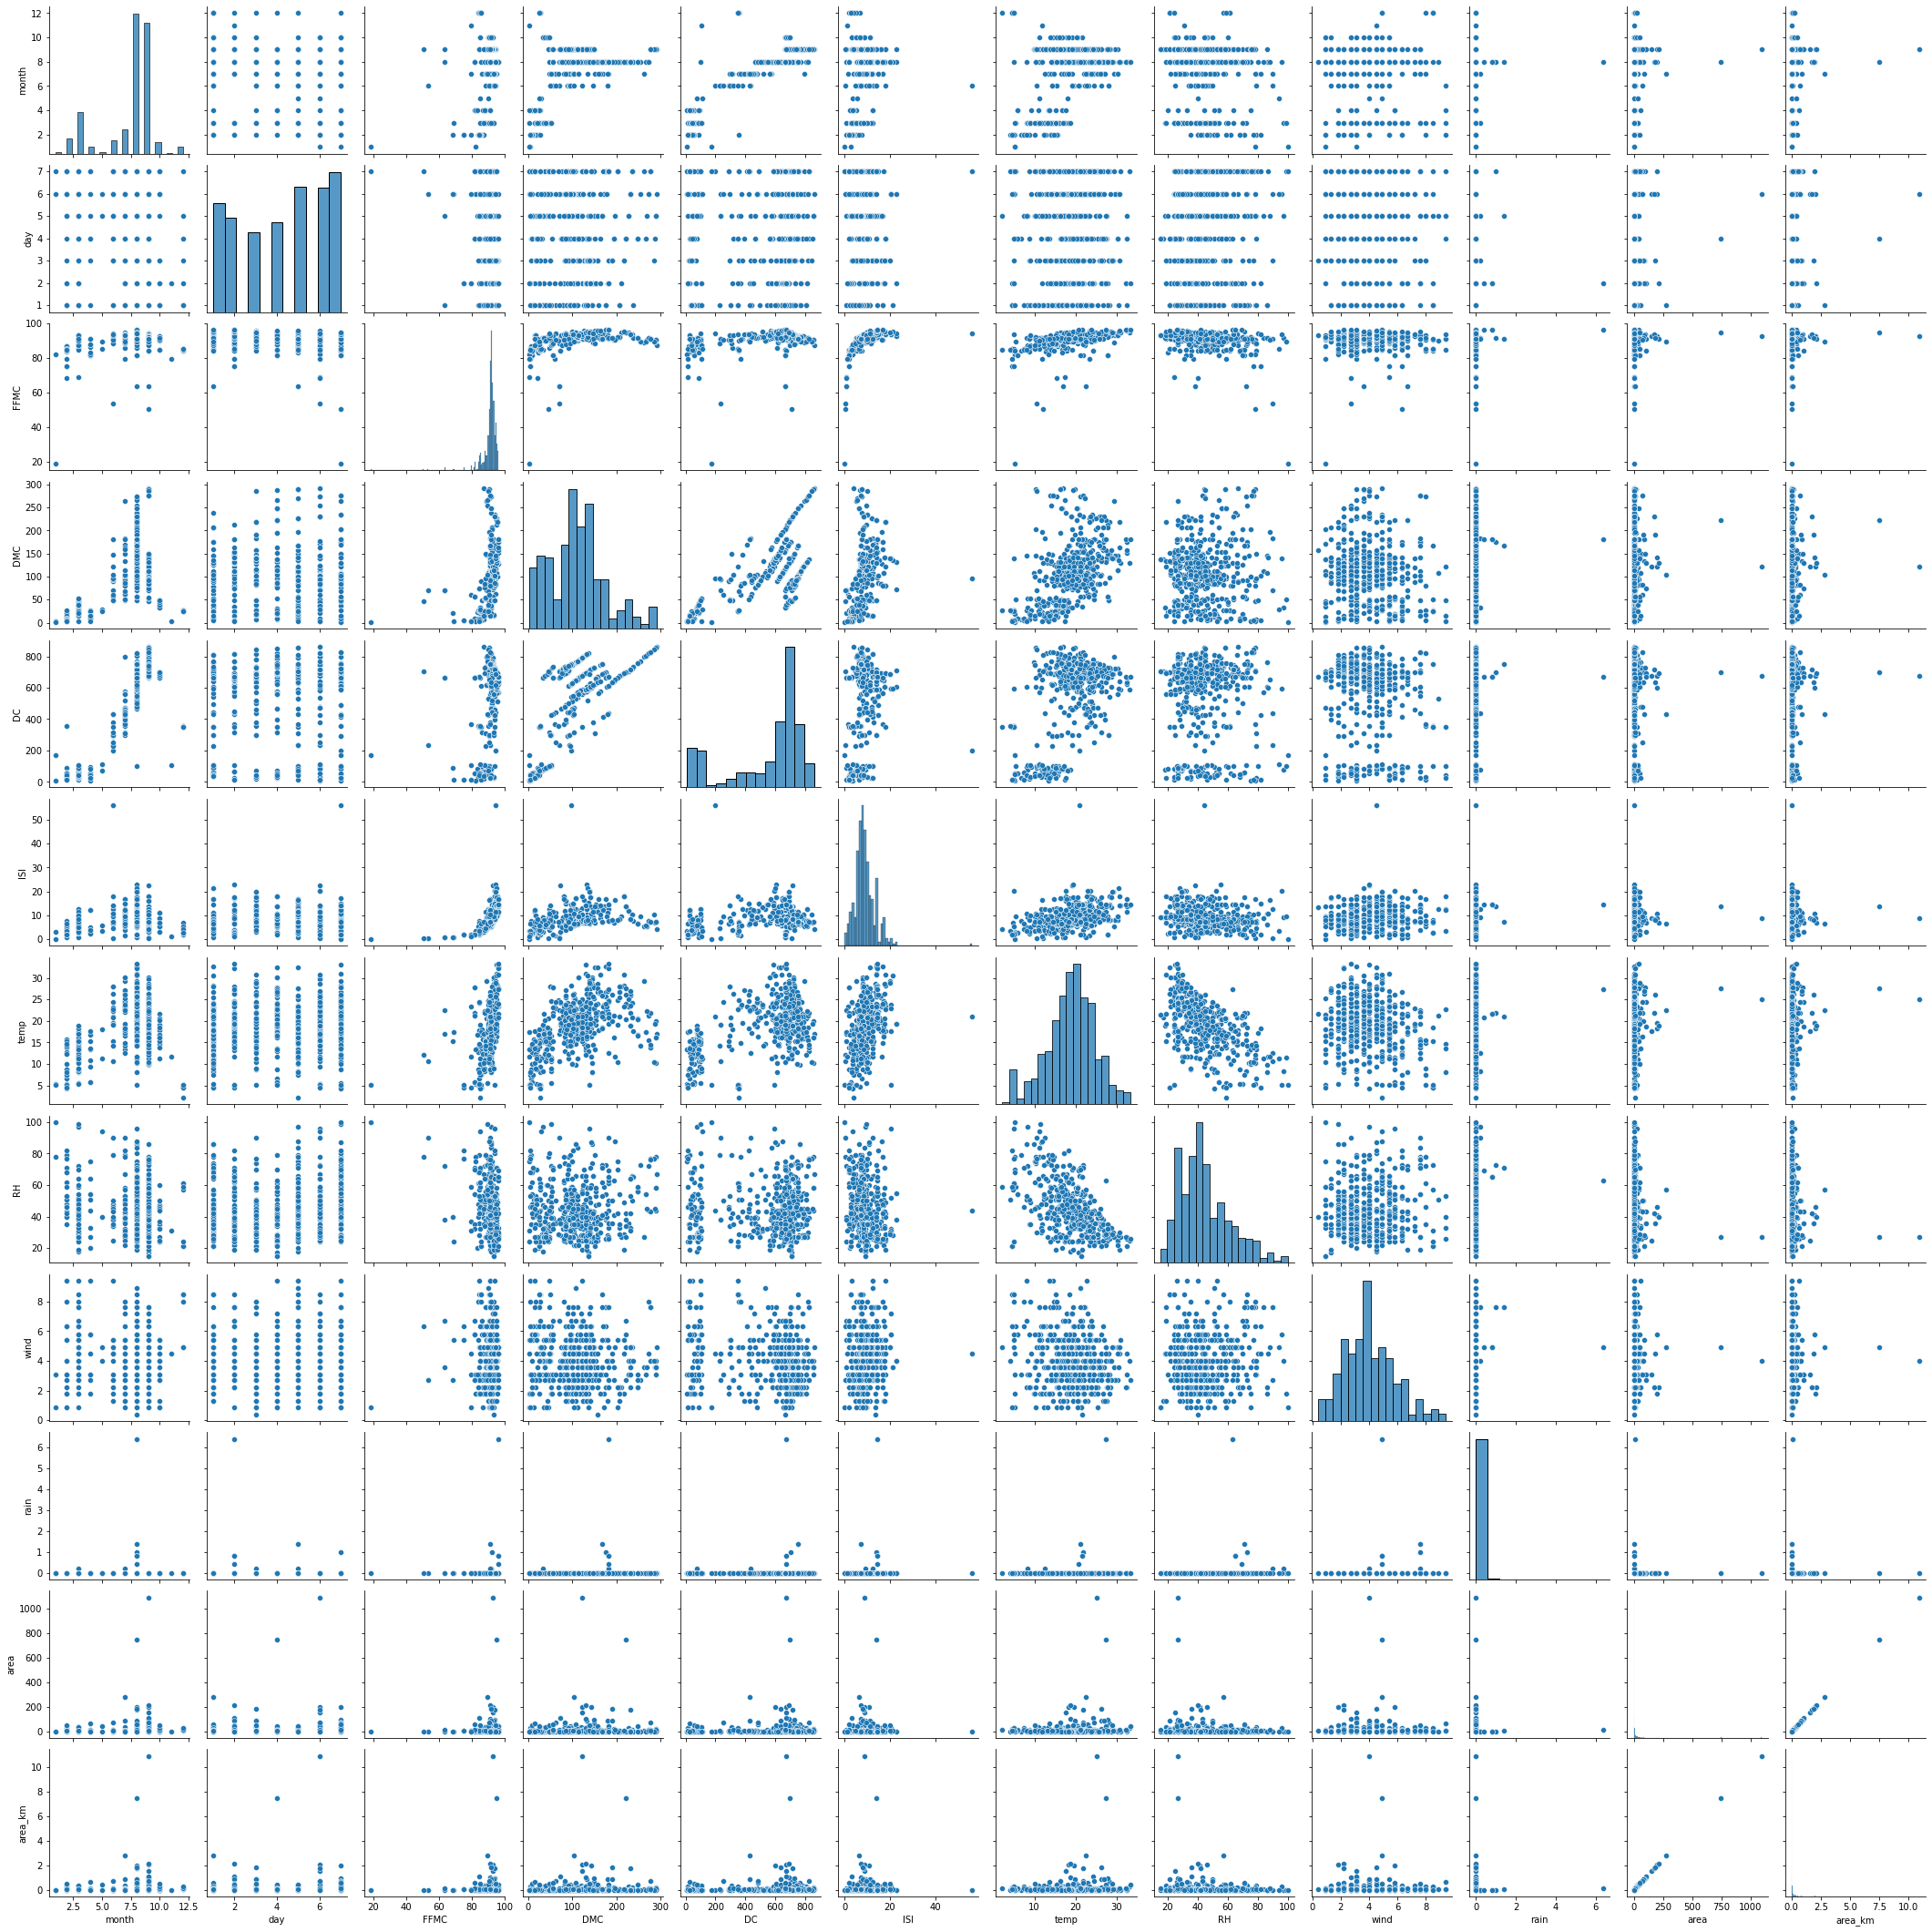

<Figure size 216x216 with 0 Axes>

In [24]:
sns.pairplot((df))
plt.figure(figsize=(3,3))

In [25]:
df.corr()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_km
month,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496,0.056496
day,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226,0.023226
FFMC,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.040122
DMC,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,0.072994
DC,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,0.049383
ISI,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.008258
temp,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,0.097844
RH,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,-0.075519
wind,-0.086368,0.032478,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.012317
rain,0.013438,-0.048340,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.007366


<AxesSubplot:>

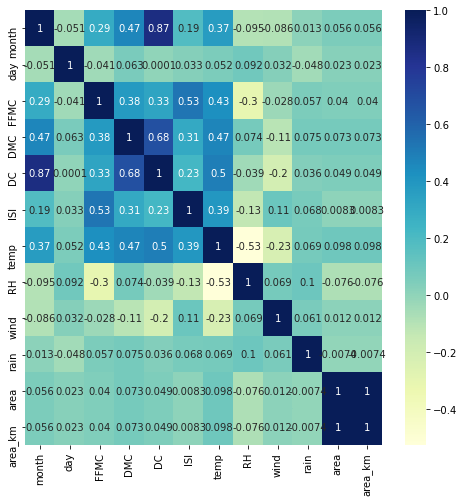

In [26]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)


## As we can see in this heatmap, The lighter color shows the higher cor-relation betweem two variables and the darker color has less relation ship.

<AxesSubplot:xlabel='area', ylabel='Density'>

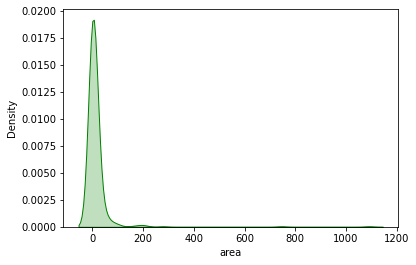

In [27]:
sns.kdeplot(df['area'],shade=True,color='g')

### The Data is highly skewed and has large kurtosis value  
### Majority of the forest fires do not cover a large area, most of the damaged area is under 100 hectares of land

<AxesSubplot:xlabel='month', ylabel='DC'>

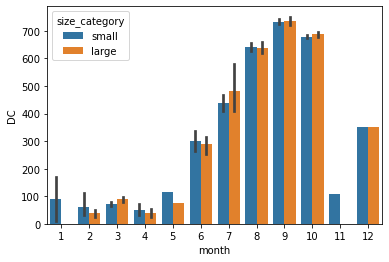

In [28]:
sns.barplot(x='month',y='DC',data=df,hue='size_category')

<AxesSubplot:xlabel='month', ylabel='DMC'>

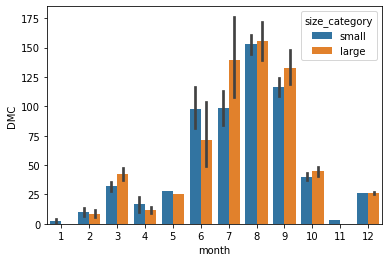

In [29]:
sns.barplot(x='month',y='DMC',data=df,hue='size_category')

In [30]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category', 'area_km'],
      dtype='object')

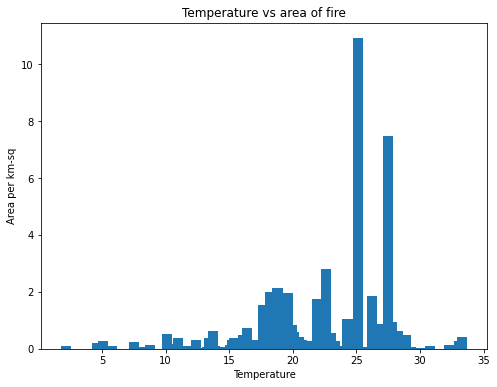

In [31]:
highest_fire_area = df.sort_values(by="area_km", ascending=True)

plt.figure(figsize=(8, 6))

plt.title("Temperature vs area of fire" )
plt.bar(highest_fire_area['temp'], highest_fire_area['area_km'])

plt.xlabel("Temperature")
plt.ylabel("Area per km-sq")
plt.show()

## Observation:
####             Here, We can see that the highest fire around the area in kilometers and the temperature. Around 25 to 30 temperature the heightst km per area fire occurs.

month
1       2
2      20
3      54
4       9
5       2
6      17
7      32
8     184
9     172
10     15
11      1
12      9
Name: area_km, dtype: int64


<BarContainer object of 12 artists>

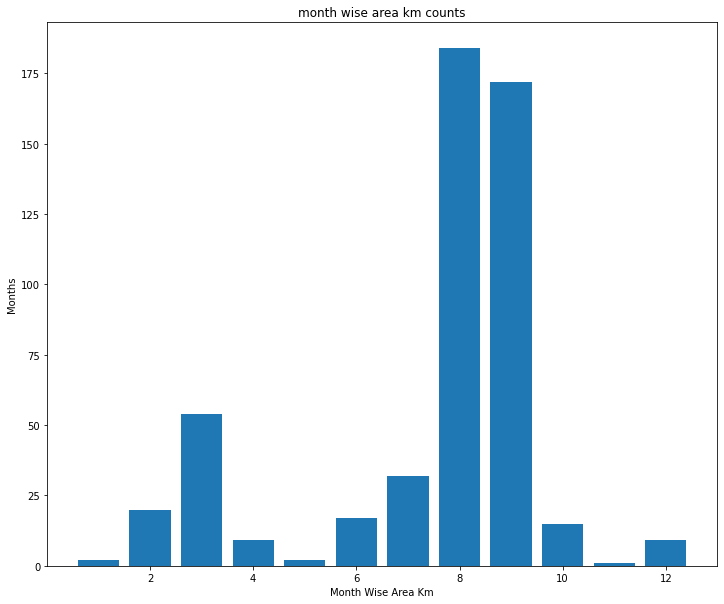

In [32]:
month_wise_area_km_count = df.groupby(['month'])['area_km'].count()
print(month_wise_area_km_count)

plt.figure(figsize=(12, 10))
plt.title("month wise area km counts")

plt.xlabel("Month Wise Area Km")
plt.ylabel("Months")
plt.bar(month_wise_area_km_count.index, month_wise_area_km_count.values)

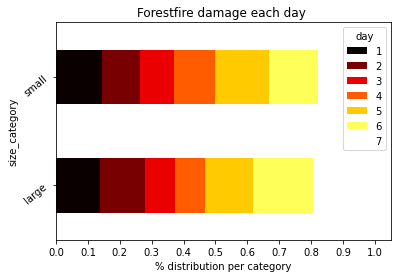

In [33]:
cross = pd.crosstab(index=df['size_category'],columns=df['day'],normalize='index')
cross.plot.barh(stacked=True,rot=40,cmap='hot')
plt.xlabel('% distribution per category')
plt.xticks(np.arange(0,1.1,0.1))
plt.title("Forestfire damage each day ")
plt.show()

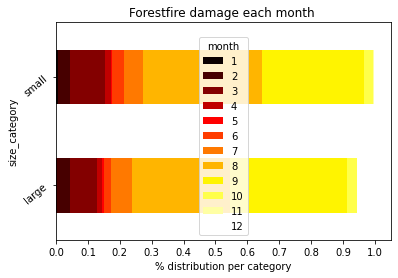

<Figure size 720x576 with 0 Axes>

In [34]:
cross = pd.crosstab(index=df['size_category'],columns=df['month'],normalize='index')
cross.plot.barh(stacked=True,rot=40,cmap='hot')
plt.xlabel('% distribution per category')
plt.xticks(np.arange(0,1.1,0.1))
plt.title("Forestfire damage each month ")
plt.figure(figsize=(10,8))
plt.show()

## Regarding fire damage per day, nothing much can be observed. Except that, there were no very high damaging fires on Friday and on Saturdays it has been reported most.


### Previously we had observed that August , September and Oct had the most number of forest fires. And from the above plot of month, we can understand few things

     Most of the fires in August were low .
     The very high damages happened in only 3 months - august,july and september.

## Creating model 

In [35]:
x= df.drop(['size_category'],axis=1)
y=df['size_category']

In [36]:
y.head(),x.head()

(0    small
 1    small
 2    small
 3    small
 4    small
 Name: size_category, dtype: object,
    month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  area_km
 0      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0      0.0
 1     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0      0.0
 2     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0      0.0
 3      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0      0.0
 4      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0      0.0)

In [37]:
mapping = {'small': 1, 'large': 2}

In [38]:
y=y.replace(mapping)

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, stratify = y)

## LINEar hyperparameter 

In [40]:
model_linear = SVC(kernel = "linear",C=1.0,gamma=0.01)
model_linear.fit(x_train,y_train)
pred_train_linear = model_linear.predict(x_train)
print("Accuracy:",metrics.accuracy_score(y_train, pred_train_linear))

Accuracy: 1.0


In [64]:

pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear))

Accuracy: 0.9935897435897436


In [47]:
x_train

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_km
347,9,5,92.1,99.0,745.3,9.6,10.1,75,3.6,0.0,0.00,0.0000
495,8,1,96.2,175.5,661.8,16.8,23.9,42,2.2,0.0,0.00,0.0000
285,7,7,93.9,169.7,411.8,12.3,23.4,40,6.3,0.0,0.00,0.0000
426,8,4,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,0.0000
346,9,1,91.5,130.1,807.1,7.5,21.3,35,2.2,0.0,28.19,0.2819
...,...,...,...,...,...,...,...,...,...,...,...,...
34,9,1,91.8,78.5,724.3,9.2,21.2,32,2.7,0.0,0.00,0.0000
16,3,6,91.7,35.8,80.8,7.8,15.1,27,5.4,0.0,0.00,0.0000
298,6,3,91.2,147.8,377.2,12.7,19.6,43,4.9,0.0,0.00,0.0000
456,8,4,91.6,248.4,753.8,6.3,16.6,59,2.7,0.0,0.00,0.0000


In [50]:
import plotly.express as px

fig = px.scatter_3d(df, x='temp', y='month', z='area_km',
              color='size_category')
fig.show()

In [59]:
vec=model_linear.support_vectors_

In [55]:
y_test.shape,x_test.shape,x_train.shape,y_train.shape

((156,), (156, 12), (361, 12), (361,))

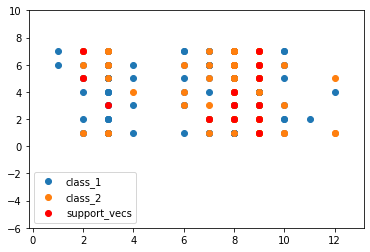

In [62]:
plt.scatter(x_train[y_train==1].iloc[:,0],x_train[y_train==1].iloc[:,1],label="class_1")
plt.scatter(x_train[y_train==2].iloc[:,0],x_train[y_train==2].iloc[:,1],label="class_2")
plt.scatter(vec[:,0],vec[:,1],color="red",label="support_vecs")
plt.ylim(-6,+10)
ax = plt.gca()
xlim = ax.get_xlim()
w = model_linear.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - model_linear.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (model_linear.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (model_linear.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')
plt.legend(loc="best")

# RBF =kernel

In [81]:
model_rbf = SVC(kernel = "rbf",gamma=1,C=1,degree=3)
model_rbf.fit(x_train,y_train)

pred_train_rbf = model_linear.predict(x_train)
print("Accuracy:",metrics.accuracy_score(y_train, pred_train_rbf))

Accuracy: 1.0


In [85]:
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_rbf))

Accuracy: 0.7307692307692307


In [86]:
vec_rbf= model_rbf.support_vectors_

In [87]:
vec_rbf

array([[ 9.    ,  5.    , 92.1   , ...,  0.    ,  0.    ,  0.    ],
       [ 8.    ,  1.    , 96.2   , ...,  0.    ,  0.    ,  0.    ],
       [ 7.    ,  7.    , 93.9   , ...,  0.    ,  0.    ,  0.    ],
       ...,
       [ 7.    ,  2.    , 93.1   , ...,  0.    , 86.45  ,  0.8645],
       [ 8.    ,  6.    , 91.6   , ...,  0.    , 12.18  ,  0.1218],
       [ 8.    ,  5.    , 93.9   , ...,  0.    , 10.02  ,  0.1002]])

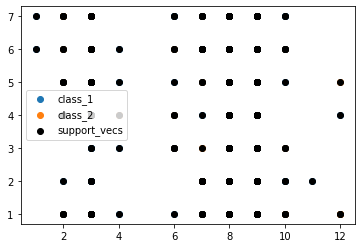

In [88]:
_
plt.scatter(x_train[y_train==1].iloc[:,0],x_train[y_train==1].iloc[:,1],label="class_1")
plt.scatter(x_train[y_train==2].iloc[:,0],x_train[y_train==2].iloc[:,1],label="class_2")
plt.scatter(vec_rbf[:,0],vec_rbf[:,1],color="black",label="support_vecs")
plt.legend(loc="best")